<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/Practice_MNIST_CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://nextjournal.com/gkoehler/pytorch-mnist
===========
https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627
===========

In [42]:
import numpy as np
import torch 
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch import optim

In [5]:
import os

In [43]:
transforms = transforms.Compose([transforms.ToTensor()])

In [44]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', 
                          download = True, 
                          train = True, 
                          transform=transforms)

trainloader = torch.utils.data.DataLoader(trainset, 
                                          batch_size= 64, 
                                          shuffle= True)

valset = datasets.MNIST('PATH_TO_STORE_TESTSET', 
                        download=True, 
                        train = False, 
                        transform=transforms)

valloader = torch.utils.data.DataLoader(valset, 
                                        batch_size=64, 
                                        shuffle=True)

In [45]:
print(len(trainloader.dataset))
print(len(trainloader))
print(len(valloader.dataset))

60000
938
10000


In [46]:
datiter = iter(trainloader)
images, labels = next(datiter)

In [47]:
print(images.shape)
print(labels.shape)
print(images[0].numpy().shape)
print(images[0].numpy().squeeze().shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])
(1, 28, 28)
(28, 28)


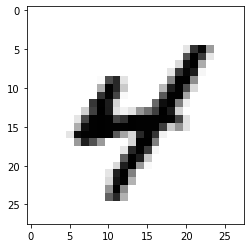

In [48]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

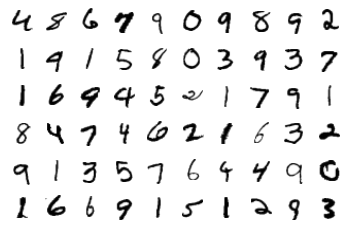

In [49]:
figure = plt.figure()
num_of_images = 60
for i in range(1, num_of_images + 1):
  plt.subplot(6 , 10, i)
  plt.axis('off')
  plt.imshow(images[i].numpy().squeeze(), cmap='gray_r')

In [50]:
input_size = 784
hidden_sizes = [128, 64, 32, 16]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]), nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]), nn.ReLU(),
                      nn.Linear(hidden_sizes[1], hidden_sizes[2]), nn.ReLU(),
                      nn.Linear(hidden_sizes[2], hidden_sizes[3]), nn.ReLU(),
                      nn.Linear(hidden_sizes[3], output_size), nn.LogSoftmax(dim=1))

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)


In [51]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu" )
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=32, bias=True)
  (5): ReLU()
  (6): Linear(in_features=32, out_features=16, bias=True)
  (7): ReLU()
  (8): Linear(in_features=16, out_features=10, bias=True)
  (9): LogSoftmax(dim=1)
)

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)

    # Training pass
    optimizer.zero_grad()

    # forward + backward + optimize 
    output = model(images.cuda())
    loss = criterion(output, labels.cuda())
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  else:
    print(f'Epoch {e} - Training loss: {running_loss/len(trainloader)}')
print(f'\nTraining Time (in minutes) = {(time() - time0)/ 60}')

Epoch 0 - Training loss: 1.9621684302144975
Epoch 1 - Training loss: 0.6936638944947136
Epoch 2 - Training loss: 0.32285004015416224
Epoch 3 - Training loss: 0.21584669844523421
Epoch 4 - Training loss: 0.16849050414103117
Epoch 5 - Training loss: 0.1356213740460368
Epoch 6 - Training loss: 0.11448518336931271
Epoch 7 - Training loss: 0.09869465307205487
Epoch 8 - Training loss: 0.08504887173986876
Epoch 9 - Training loss: 0.07489211369119188
Epoch 10 - Training loss: 0.06531243436217213
Epoch 11 - Training loss: 0.0587421784491173
Epoch 12 - Training loss: 0.052912050892642615
Epoch 13 - Training loss: 0.047236237898598044
Epoch 14 - Training loss: 0.039836828538434094

Training Time (in minutes) = 1.3847509503364563


In [53]:
def view_classify(img, ps):
  ps = ps.cpu().data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize = (6, 9), ncols = 2)
  ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
  ax1.axis('off')
  ax2.barh(np.arange(10), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(10))
  ax2.set_yticklabels(np.arange(10))
  ax2.set_title('Class Probability')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

Predicted Digit = 0


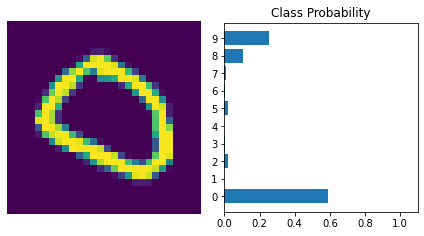

In [55]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)

with torch.no_grad():
  logps = model(img.cuda())

ps = torch.exp(logps)
probab = list(ps.cpu().numpy()[0])
print(f"Predicted Digit = {probab.index(max(probab))}")
view_classify(img.view(1,28,28), ps)

In [56]:
correct_count, all_count = 0, 0
for images, labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
      logps = model(img.cuda())

    ps = torch.exp(logps)
    probab = list(ps.cpu().numpy()[0])
    pre_label = probab.index(max(probab))
    true_label = labels.numpy()[i]

    if (true_label == pre_label):
      correct_count += 1
    all_count += 1

print(f"Number Of Images Tested = {all_count}")
print(f"\nModel Accuracy = {correct_count/all_count}")

Number Of Images Tested = 10000

Model Accuracy = 0.9711
